# Diversificación y fuentes de riesgo en un portafolio II - Una ilustración con mercados internacionales.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5f/Map_International_Markets.jpg" width="500px" height="300px" />

> Entonces, la clase pasada vimos cómo afecta la correlación entre pares de activos en un portafolio. Dijimos que como un par de activos nunca tienen correlación perfecta, al combinarlos en un portafolio siempre conseguimos diversificación del riesgo.

> Vimos también que no todo el riesgo se puede diversificar. Dos fuentes de riesgo:
> - Sistemático: afecta de igual manera a todos los activos. No se puede diversificar.
> - Idiosincrático: afecta a cada activo en particular por razones específicas. Se puede diversificar.

En esta clase veremos un ejemplo de diversificación en un portafolio, usando datos de mercados de activos internacionales.

En el camino, definiremos términos como *frontera de mínima varianza*, *portafolio de mínima varianza* y *portafolios eficientes*, los cuales son básicos para la construcción de la **teoría moderna de portafolios**.

Estos portafolios los aprenderemos a obtener formalmente en el siguiente módulo. Por ahora nos bastará con agarrar intuición.

**Objetivo:**
- Ver los beneficios de la diversificación ilustrativamente.
- ¿Qué es la frontera de mínima varianza?
- ¿Qué son el portafolio de varianza mínima y portafolios eficientes?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Ejemplo

**Los datos:** tenemos el siguiente reporte de rendimientos esperados y volatilidad (anuales) para los mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


¿Qué podemos notar?
- En cuanto al rendimiento esperado: son similares. El mínimo es de 13.5% y el máximo es de 15.9%.
- En cuanto al riesgo: hay mucha dispersión. Varía desde 15.3% hasta 24.3%.

Además, tenemos el siguiente reporte de la matriz de correlación:

In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


¿Qué se puede observar acerca de la matriz de correlación?

- Los índices con mayor correlación son: Francia y Alemania.
- Los índices con menor correlación son: Japón y Estados Unidos.

Recordar: correlaciones bajas significan una gran oportunidad para diversificación.

### ¿Cómo encontrar la matriz de covarianzas?

In [4]:
help(np.diag)

Help on function diag in module numpy:

diag(v, k=0)
    Extract a diagonal or construct a diagonal array.
    
    See the more detailed documentation for ``numpy.diagonal`` if you use this
    function to extract a diagonal and wish to write to the resulting array;
    whether it returns a copy or a view depends on what version of numpy you
    are using.
    
    Parameters
    ----------
    v : array_like
        If `v` is a 2-D array, return a copy of its `k`-th diagonal.
        If `v` is a 1-D array, return a 2-D array with `v` on the `k`-th
        diagonal.
    k : int, optional
        Diagonal in question. The default is 0. Use `k>0` for diagonals
        above the main diagonal, and `k<0` for diagonals below the main
        diagonal.
    
    Returns
    -------
    out : ndarray
        The extracted diagonal or constructed diagonal array.
    
    See Also
    --------
    diagonal : Return specified diagonals.
    diagflat : Create a 2-D array with the flattened input 

In [6]:
# Crear matriz diagonal con la info de las volatilidades individuales
s = np.diag(annual_ret_summ.loc['Volatilidad']).astype(float)
s

array([[0.1535, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.243 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.2324, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.2038, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.2298]])

In [7]:
# A partir de la matriz anterior y la matriz de correlación:
sigma = s.dot(corr).dot(s)
sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

### Nos enfocaremos entonces únicamente en dos mercados: EU y Japón

- ¿Cómo construiríamos un portafolio que consiste de los mercados de acciones de EU y Japón?
- ¿Cuáles serían las posibles combinaciones?

#### 1. Supongamos que $w$ es la participación del mercado de EU en nuestro portafolio.
- ¿Cuál es la participación del mercado de Japón entonces?: $1-w$

- Luego, nuestras fórmulas de rendimiento esperado y varianza de portafolios son:

$$E[r_p]=wE[r_{EU}]+(1-w)E[r_J]$$

$$\sigma_p^2=w^2\sigma_{EU}^2+(1-w)^2\sigma_J^2+2w(1-w)\sigma_{EU,J}$$

#### 2. Con lo anterior...
- podemos variar $w$ con pasos pequeños entre $0$ y $1$, y
- calcular el rendimiento esperado y volatilidad para cada valor de $w$.

In [12]:
annual_ret_summ

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [13]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)
# Rendimientos esperados individuales
# Activo1: EU, Activo2: Japon
# Rendimientos esperados individuales
e_eu = annual_ret_summ.loc["Media", "EU"]
e_jp = annual_ret_summ.loc["Media", "Japon"]
# Volatilidades individuales
s_eu = annual_ret_summ.loc["Volatilidad", "EU"]
s_jp = annual_ret_summ.loc["Volatilidad", "Japon"]
# Correlacion
r = corr.loc["EU", "Japon"]
# Covarianza
cov = r * s_eu * s_jp

$$
\rho_{ij} = \frac{\sigma_{ij}}{\sigma_i \sigma_j} \Rightarrow \sigma_{ij} = \sigma_i \sigma_j \rho_{ij}
$$

$$E[r_p]=wE[r_{EU}]+(1-w)E[r_J]$$

$$\sigma_p^2=w^2\sigma_{EU}^2+(1-w)^2\sigma_J^2+2w(1-w)\sigma_{EU,J}$$

In [15]:
# Crear un DataFrame cuyas columnas sean rendimiento esperado
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame({
    "w(EU)": w,
    "w(Japon)": 1 - w,
    "media": w * e_eu + (1 - w) * e_jp,
    "vol": (
        (w * s_eu)**2
        + ((1 - w) * s_jp)**2
        + 2 * w * (1 - w) * cov
    )**0.5
})
portafolios2

,w(EU),w(Japon),media,vol
0,0.00,1.00,0.149700,0.229800
1,0.01,0.99,0.149558,0.227916
2,0.02,0.98,0.149416,0.226041
3,0.03,0.97,0.149274,0.224176
4,0.04,0.96,0.149132,0.222322
...,...,...,...,...
96,0.96,0.04,0.136068,0.150070
97,0.97,0.03,0.135926,0.150877
98,0.98,0.02,0.135784,0.151719
99,0.99,0.01,0.135642,0.152593


#### 3. Finalmente, 
- cada una de las combinaciones las podemos graficar en el espacio de rendimiento esperado (eje $y$) contra volatilidad (eje $x$).

In [16]:
# Importar matplotlib.pyplot
from matplotlib import pyplot as plt

In [18]:
# \rho=1
vol_corr_1 = (
    (w * s_eu)**2
    + ((1 - w) * s_jp)**2
    + 2 * w * (1 - w) * s_eu * s_jp
)**0.5
# \rho=-1
vol_corr_m1 = (
    (w * s_eu)**2
    + ((1 - w) * s_jp)**2
    - 2 * w * (1 - w) * s_eu * s_jp
)**0.5

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

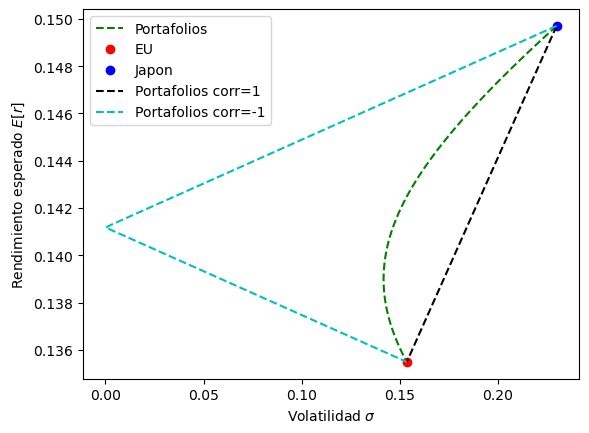

In [23]:
# Graficar el lugar geométrico de los portafolios en el
# espacio rendimiento esperado vs. volatilidad.
# Especificar también los puntos relativos a los casos
# extremos.
# Caso real
plt.plot(
    portafolios2["vol"],
    portafolios2["media"],
    "g--",
    label="Portafolios"
)
plt.plot(s_eu, e_eu, "or", label="EU")
plt.plot(s_jp, e_jp, "ob", label="Japon")
# Si la correlación fuera +1
plt.plot(
    vol_corr_1,
    portafolios2["media"],
    "k--",
    label="Portafolios corr=1"
)
# Si la correlación fuera -1
plt.plot(
    vol_corr_m1,
    portafolios2["media"],
    "c--",
    label="Portafolios corr=-1"
)
plt.legend()
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

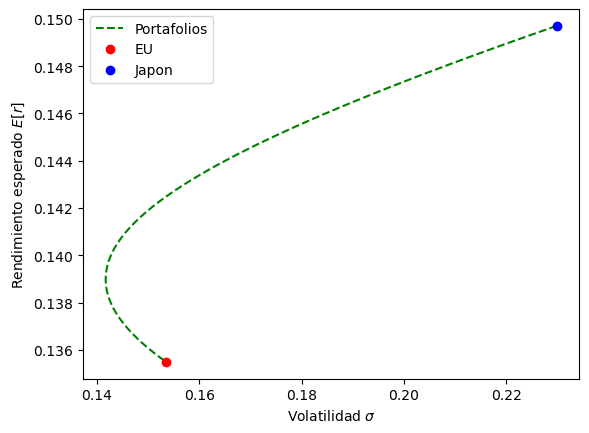

In [25]:
plt.plot(
    portafolios2["vol"],
    portafolios2["media"],
    "g--",
    label="Portafolios"
)
plt.plot(s_eu, e_eu, "or", label="EU")
plt.plot(s_jp, e_jp, "ob", label="Japon")
plt.legend()
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

#### De la gráfica,
1. Ver casos extremos.
2. ¿Conviene invertir 100% en el mercado de EU? ¿Porqué?
3. ¿Porqué ocurre esto?
4. Definición: frontera de mínima varianza. Caso particular: dos activos.
5. Definición: portafolio de varianza mínima.
6. Definición: portafolios eficientes.

#### 1. Definición (frontera de mínima varianza): es el lugar geométrico de los portafolios en el espacio de rendimiento esperado contra volatilidad, que para cada nivel de rendimiento esperado provee la menor varianza (volatilidad). Para dos activos, la frontera de mínima varianza son, simplemente, todos los posibles portafolios que se pueden formar con esos dos activos.


#### 2. Definición (portafolio de mínima varianza): es el portafolio que posee la menor varianza. No podemos encontrar ningún portafolio más a la izquierda de éste, en el espacio de rendimiento esperado contra volatilidad.


#### 3. Definición (portafolios eficientes): son los portafolios que están en la parte superior de la frontera de mínima varianza, partiendo desde el portafolio de mínima varianza.

___


## 2. ¿Cómo hallar el portafolio de varianza mínima?

Bien, esta será nuestra primera selección de portafolio. Si bien se hace de manera básica e intuitiva, nos servirá como introducción al siguiente módulo. 

**Comentario:** estrictamente, el portafolio que está más a la izquierda en la curva de arriba es el de *volatilidad mínima*. Sin embargo, como tanto la volatilidad es una medida siempre positiva, minimizar la volatilidad equivale a minimizar la varianza. Por lo anterior, llamamos a dicho portafolio, el portafolio de *varianza mínima*.

De modo que la búsqueda del portafolio de varianza mínima corresponde a la solución del siguiente problema de optimización:

- Para un portafolio con $n$ activos ($\boldsymbol{w}=[w_1,\dots,w_n]^T\in\mathbb{R}^n$):
\begin{align*}
&\min_{\boldsymbol{w}} & \sigma_p^2=\boldsymbol{w}^T\Sigma\boldsymbol{w}\\
&\text{s.t.} \qquad & \boldsymbol{w}\geq0,\\
& & w_1+\dots+w_n=1
\end{align*}
donde $\Sigma$ es la matriz de varianza-covarianza de los rendimientos de los $n$ activos.

- En particular, para un portafolio con dos activos el problema anterior se reduce a:
\begin{align*}
&\min_{w_1,w_2}\sigma_p^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\sigma_{12}\\
&\text{s.t.} \qquad w_1,w_2\geq0, \qquad w_1 + w_2 = 1
\end{align*}
donde $\sigma_1,\sigma_2$ son las volatilidades de los activos individuales y $\sigma_{12}$ es la covarianza entre los activos. Equivalentemente, haciendo $w_1=w$ y $w_2=1-w$, el problema anterior se puede reescribir de la siguiente manera:
\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}

La solución al anterior problema de optimización es
$$w^{\ast}=\frac{\sigma_2^2 - \sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$$

1. Los anteriores son problemas de **programación cuadrática** (función convexa sobre dominio convexo: mínimo absoluto asegurado). 
2. Existen diversos algoritmos para problemas de programación cuadrática. Por ejemplo, en la librería cvxopt. Más adelante la instalaremos y la usaremos.
3. En scipy.optimize no hay un algoritmo dedicado a la solución de este tipo de problemas de optimización. Sin embargo, la función mínimize nos permite resolver problemas de optimización en general (es un poco limitada, pero nos sirve por ahora).

### 2.1. Antes de resolver el problema con la función minimize: resolverlo a mano en el tablero.

In [ ]:
# Calcular w_minvar y mostrar...


**Conclusiones:**
- Para obtener el portafolio de mínima varianza, deberíamos invertir aproximadamente el 75.40% en el índice de EU, y el 24.60% restante en el índice de Japón.

### 2.2. Ahora sí, con la función scipy.optimize.minimize

In [ ]:
# Importar la función minimize


In [ ]:
# Función minimize


\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\sigma_{12}\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}

In [ ]:
# Función objetivo


In [ ]:
# Dato inicial

# Cota de w


In [ ]:
# Solución


In [ ]:
# Peso del portafolio de minima varianza


In [ ]:
# Rendimiento esperado y volatilidad del portafolio de minima varianza


In [ ]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente


___

## 3. Ahora, para tres activos, obtengamos la frontera de mínima varianza

In [ ]:
import scipy.optimize as opt

In [ ]:
## Construcción de parámetros
## Activo 1: EU, Activo 2: Japon, Activo 3: RU
# 1. Sigma: matriz de varianza-covarianza
s1 = annual_ret_summ['EU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']
s3 = annual_ret_summ['RU']['Volatilidad']
s12 = corr['EU']['Japon'] * s1 * s2
s13 = corr['EU']['RU'] * s1 * s3
s23 = corr['Japon']['RU'] * s2 * s3
Sigma = np.array([[s1**2, s12, s13],
                  [s12, s2**2, s23],
                  [s13, s23, s3**2]])
# 2. Eind: rendimientos esperados activos individuales
E1 = annual_ret_summ['EU']['Media']
E2 = annual_ret_summ['Japon']['Media']
E3 = annual_ret_summ['RU']['Media']
Eind = np.array([E1, E2, E3])
# 3. Ereq: rendimientos requeridos para el portafolio
# Número de portafolios
N = 100
Ereq = np.linspace(Eind.min(), Eind.max(), N)

In [ ]:
def varianza(w, Sigma):
    return w.T.dot(Sigma).dot(w)
def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req
    # return Eind.T.dot(w) - mu_req

In [ ]:
# Dato inicial
w0 = np.ones(3,) / 3
# Cotas de las variables
bnds = ((0, 1),) * 3

In [ ]:
# DataFrame de portafolios de la frontera
portfolios3 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'Ret', 'Vol'])

In [ ]:
# Construcción de los N portafolios de la frontera
for i in range(N):
    # Restricciones
    cons = ({'type': 'eq', 'fun': rendimiento_req, 'args': (Eind, Ereq[i])},
            {'type': 'eq', 'fun': lambda w: w.sum() - 1})
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = opt.minimize(fun=varianza,
                           x0=w0,
                           args=(Sigma,),
                           bounds=bnds,
                           constraints=cons)
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolios3.loc[i, ['w1','w2','w3']] = min_var.x
    portfolios3['Ret'][i] = Eind.dot(min_var.x)
    portfolios3['Vol'][i] = np.sqrt(varianza(min_var.x, Sigma))

In [ ]:
# Portafolios de la frontera
portfolios3

In [ ]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)
min_var3 = opt.minimize(varianza, 
                        w0,
                        args=(Sigma,),
                        bounds=bnds,
                        constraints=cons)
min_var3

In [ ]:
w_minvar3 = min_var3.x
E_minvar3 = Eind.dot(w_minvar3)
s_minvar3 = np.sqrt(varianza(w_minvar3, Sigma))

In [ ]:
# Graficamos junto a los portafolios de solo EU y Japón
plt.figure(figsize=(12,8))
plt.plot(portafolios['vol'], portafolios['media'], label='Portafolios 2 act')
plt.plot(portfolios3.Vol, portfolios3.Ret, 'k-', lw=2, label='Portafolios 3 act')
plt.plot(s1, E1, 'b*', ms=10, label='EU')
plt.plot(s2, E2, 'r*', ms=10, label='Japon')
plt.plot(s3, E3, 'c*', ms=10, label='RU')
plt.plot(sminvar, eminvar, 'oy', ms=10, label='Port. Min. Var. 2')
plt.plot(s_minvar3, E_minvar3, 'om', ms=10, label='Port. Min. Var. 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
# Zoom
plt.axis([0.14, 0.16, 0.135, 0.14])

In [ ]:
eminvar, sminvar, w_minvar, 1 - w_minvar

In [ ]:
E_minvar3, s_minvar3, w_minvar3

**Conclusión.** Mayor diversificación.
___

## 4. Comentarios acerca de la Teoría Moderna de Portafolios.

- Todo lo anterior es un abrebocas de lo que llamamos análisis de media-varianza, y que es la base de la teoría moderna de portafolios.
- El análisis de media-varianza transformó el mundo de las inversiones cuando fué presentada por primera vez.
- Claro, tiene ciertas limitaciones, pero se mantiene como una de las ideas principales en la selección óptima de portafolios.

### Historia.

1. Fue presentada por primera vez por Harry Markowitz en 1950. Acá su [artículo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjd0cOTx8XdAhUVo4MKHcLoBhcQFjAAegQICBAC&url=https%3A%2F%2Fwww.math.ust.hk%2F~maykwok%2Fcourses%2Fma362%2F07F%2Fmarkowitz_JF.pdf&usg=AOvVaw3d29hQoNJVqXvC8zPuixYG).
2. Era un joven estudiante de Doctorado en la Universidad de Chicago.
3. Publicó su tesis doctoral en selección de portafolios en "Journal of Finance" en 1952.
4. Su contribución transformó por completo la forma en la que entendemos el riesgo.
5. Básicamente obtuvo una teoría que analiza como los inversionistas deberían escoger de manera óptima sus portafolios, en otras palabras, cómo distribuir la riqueza de manera óptima en diferentes activos.
6. Casi 40 años después, Markowitz ganó el Premio Nobel en economía por esta idea.

- La suposición detrás del análisis media-varianza es que los rendimientos de los activos pueden ser caracterizados por completo por sus rendimientos esperados y volatilidad.
- Por eso es que graficamos activos y sus combinaciones (portafolios) en el espacio de rendimiento esperado contra volatilidad.
- El análisis media-varianza es básicamente acerca de la diversificación: la interacción de activos permite que las ganancias de unos compensen las pérdidas de otros.
- La diversificación reduce el riesgo total mientras combinemos activos imperfectamente correlacionados. 

- En el siguiente módulo revisaremos cómo elegir portafolios óptimos como si los inversionistas sólo se preocuparan por medias y varianzas.
- ¿Qué pasa si un inversionista también se preocupa por otros momentos (asimetría, curtosis...)?
- La belleza del análisis media-varianza es que cuando combinamos activos correlacionados imperfectamente, las varianzas siempre decrecen (no sabemos que pasa con otras medidas de riesgo).
- Si a un inversionista le preocupan otras medidas de riesgo, el análisis media-varianza no es el camino.

- Además, si eres una persona que le gusta el riesgo: quieres encontrar la próxima compañía top que apenas va arrancando (como Google en los 2000) e invertir todo en ella para generar ganancias extraordinarias; entonces la diversificación no es tampoco el camino.
- La diversificación, por definición, elimina el riesgo idiosincrático (de cada compañía), y por tanto elimina estos rendimientos altísimos que brindaría un portafolio altamente concentrado.

# Anuncios parroquiales

## 1. Segunda entrega tarea 4 para hoy.

## 2. Revisar archivo de la Tarea 5 - para el lunes 3 de octubre.

## 3. La próxima clase es de repaso, sin embargo, el repaso no lo hago yo, lo hacen ustedes. Estaremos resolviendo todo tipo de dudas que ustedes planteen acerca de lo visto hasta ahora. Si no hay dudas, dedicarán el tiempo de la clase a tareas del curso.

## 4. Fin Módulo 2: revisar Clase0 para ver objetivos.

## 5. Examen para el miércoles 5 de octubre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>